# Prior estimation

In [1]:
include("src/main.jl")
OPTCONFIG=OptConfig(XTOLABS=1e-8, DEBUG=true);

## The Model

In [2]:
# exponential
xlims = (0,4)
n = 50 # was 500
ndata = 100
σ = 0.3
prior = Truncated(MixtureModel([Normal(mu, .5) for mu in [1, 3]]), xlims...)


t    = Transformation(x->exp(x), x->log(x))

Transformation(#79, #80)

In [3]:
srand(90)
m = FEModel(f=x->x, xs=linspace(xlims...,n), σ=σ)
d = generatedata(m, prior, ndata);
mt   = transformmodel(m, t)

FEModel(ft, 1.0:1.0938397965947804:54.598150033144236, 0.3)

In [4]:
ncv = 20
kfold = length(d);

## Results

 31.2558

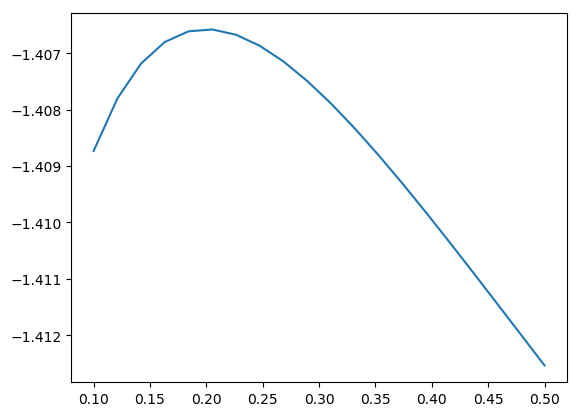

00 seconds (52.18 M allocations: 22.301 GiB, 15.51% gc time)


0.20526315789473684

In [5]:
## er estimator
regs = [ReferenceRegularizer(m, γ) for γ in linspace(0.1,.5,ncv)]
@time ss = [cvscore(m, d, d->ebprior(m, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regR = regs[indmax(ss)].γ

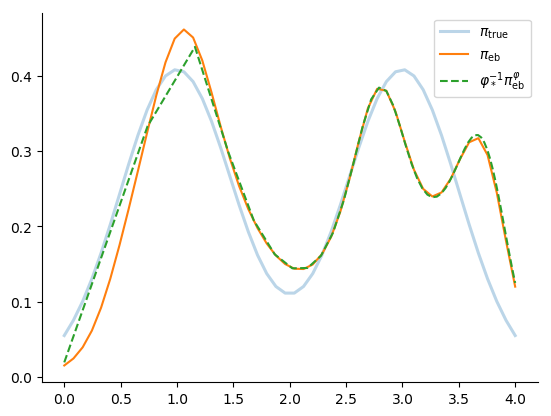

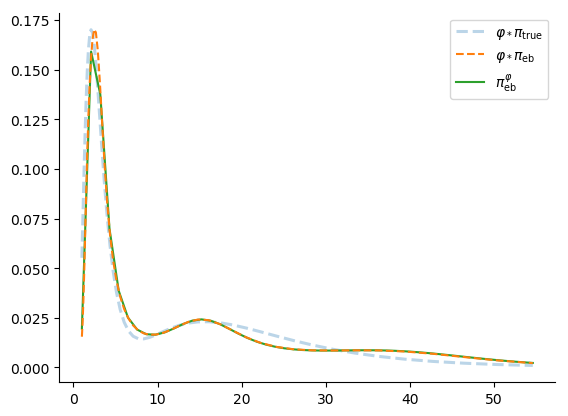

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f6455cbdd10>), PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f6455b3aa50>))

In [6]:
wR  = ebprior(m,  d, ReferenceRegularizer(m,  regR))
wRt = ebprior(mt, d, ReferenceRegularizer(mt, regR))

compareplot(m, t, pdf.(prior, m.xs), wR, wRt, "eb")

 28

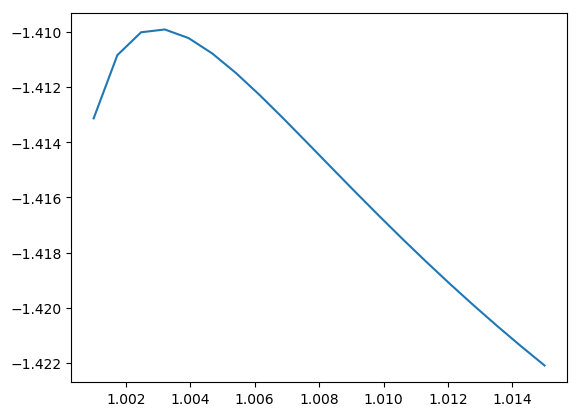

.286451 seconds (51.29 M allocations: 22.427 GiB, 18.35% gc time)


1.0032105263157896

In [7]:
## dp estimator
regs = [DirichletRegularizer(α) for α in linspace(1.001, 1.015, ncv)]
@time ss = [cvscore(m, d, d->ebprior(m, d, r), kfold) for r in regs]
plot([r.α for r in regs], ss)
regD = regs[indmax(ss)].α

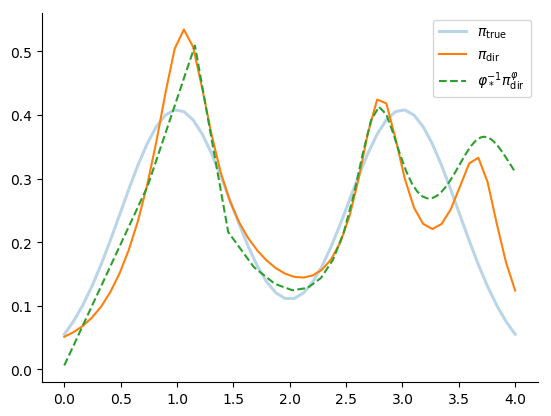

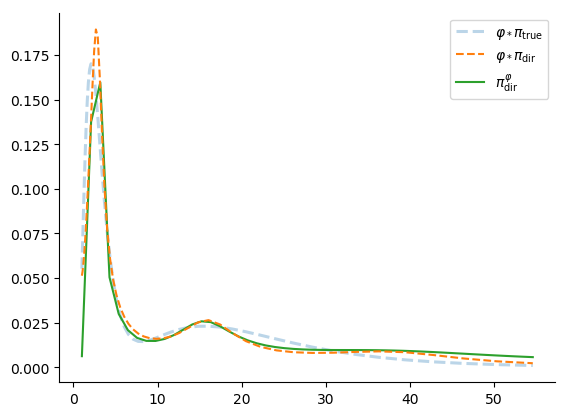

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f6451005a10>), PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f6450f84ad0>))

In [8]:
wD  = ebprior(m,  d, DirichletRegularizer(regD))
wDt = ebprior(mt, d, DirichletRegularizer(regD));

compareplot(m, t, pdf.(prior, m.xs), wD, wDt, "dir")

 35

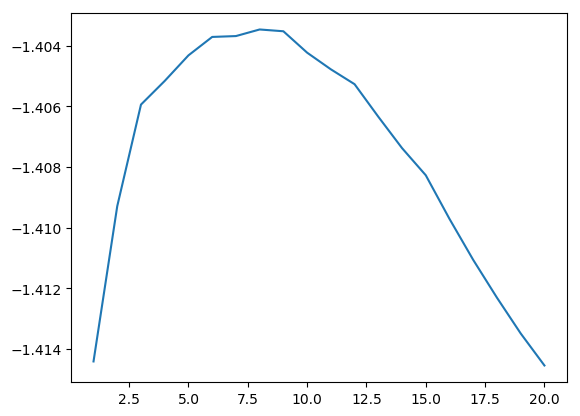

.027564 seconds (52.68 M allocations: 28.542 GiB, 19.30% gc time)


8.0

In [9]:
## thik estimator
regs = [ThikonovRegularizer(γ) for γ in linspace(1,20,ncv)]
@time ss = [cvscore(m, d, d->ebprior(m, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regT = regs[indmax(ss)].γ

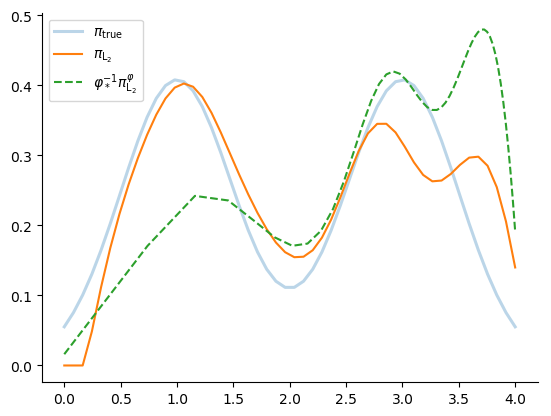

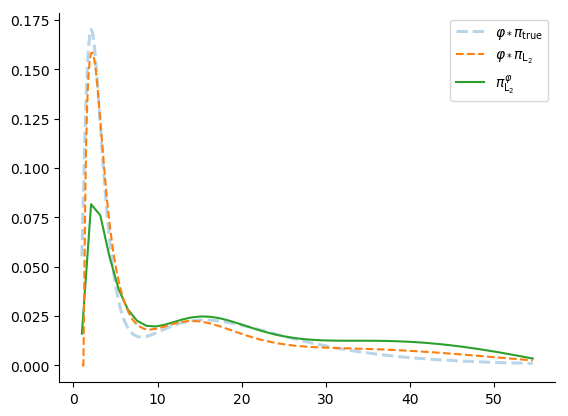

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f645100e710>), PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f6450eb4b50>))

In [10]:
wT = ebprior(m,  d, ThikonovRegularizer(regT))
wTt = ebprior(mt, d, ThikonovRegularizer(regT))

compareplot(m, t, pdf.(prior, m.xs), wT, wTt, "L_2")